## **Hyperparameter Tuning in Random Forests**

> **Objective:** The primary goal of this notebook is to predict the likelihood of breast cancer recurrence using random forest.

### **Breast Cancer Recurrence Dataset**

This dataset offers a rich collection of clinical and demographic data curated to predict breast cancer recurrence—specifically, whether a patient experiences a return of the cancer after treatment (Zwitter, M. & Soklic, M. (1988). Breast Cancer [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M). Below is an overview of the dataset and its key features:

### **Features**


- **Class:**  
  - **Description:** Outcome variable representing breast cancer recurrence.  
  - **Categories:**  
    - `no-recurrence-events`: No recurrence observed after treatment.  
    - `recurrence-events`: Cancer has recurred post-treatment.

- **Age:**  
  - **Description:** Patient’s age is provided in ranges (e.g., `20-29`, `30-39`, etc.).  

- **Menopause:**  
  - **Description:** Reflects the menopausal status of patients.  
  - **Categories:**  
    - `premeno` – premenopausal,  
    - `ge40` – typically indicates postmenopausal (at or beyond age 40),  
    - `lt40` – early menopause (before age 40).  

- **Tumor-Size:**  
  - **Description:** Tumor sizes are provided as ranges (e.g., `0-4`, `10-14`, etc.).  

- **Inv-Nodes (Involved Lymph Nodes):**  
  - **Description:** The extent of lymph node involvement is categorized in ranges (e.g., `0-2`, `3-5`, etc.).  

- **Node-Caps:**  
  - **Description:** Indicates whether there is evidence of lymph node capsule invasion.  
  - **Categories:**  
    - `no` – no capsule invasion,  
    - `yes` – capsule invasion present,  

- **Deg-Malig (Degree of Malignancy):**  
  - **Description:** Numeric indicator of tumor aggressiveness, typically coded as `1`, `2`, or `3`, with higher values representing higher malignancy.  

- **Breast:**  
  - **Description:** Indicates the laterality (left or right) of the tumor.  

- **Breast-Quad (Breast Quadrant):**  
  - **Description:** Specifies which quadrant of the breast is affected (e.g., `left_low`, `left_up`, `right_up`, `right_low`, `central`).  


- **Irradiat:**  
  - **Description:** Denotes whether the patient underwent radiation therapy.  
  - **Categories:**  
    - `no` – radiation therapy not administered,  
    - `yes` – radiation therapy was part of the treatment plan.  

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('data/breast-cancer.data', delimiter = ',', names = ['Class', 'age', 'menopause',
                                                                         'tumor-size', 'inv-nodes', 'node-caps',
                                                                         'deg-malig', 'breast', 'breast-quad',
                                                                         'irradiat'])

In [18]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### **Exploratory Data Analysis (EDA)**

Performing EDA to understand the dataset and identify any data quality issues.

In [19]:
# Check for missing values
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [20]:
# Check data types and unique values
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
dtype: int64

In [21]:
# Statistical summary of the dataset
df.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286.000000,286,286,286
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,201,96,150,60,213,222,NaN,152,110,218
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.048951,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.738217,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


### **Data Cleaning and Preprocessing**

Steps to clean and preprocess the data for modeling.

In [22]:
# Handle missing values
df['node-caps'].replace('?', np.nan, inplace=True)
df['breast-quad'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [23]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']:
    df[column] = le.fit_transform(df[column])

In [24]:
# Ensure the target variable 'Class' is encoded properly
df['Class'] = df['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

In [25]:
# Split the dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [26]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,5,0,0,3,0,1,0
1,2,2,3,0,0,2,1,4,0
2,2,2,3,0,0,2,0,1,0
3,4,0,2,0,0,2,1,2,0
4,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,0,2,0,2,0
282,1,2,3,0,0,3,0,2,1
283,4,0,3,0,0,1,1,2,0
284,2,0,5,4,0,3,0,1,0


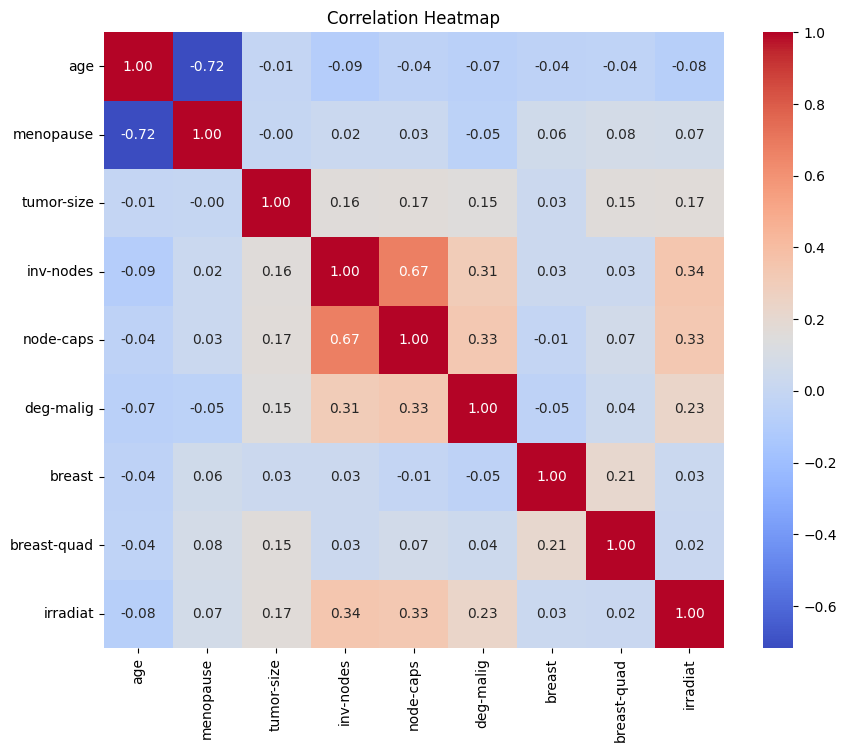

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)